In [379]:
# using Pkg
# Pkg.add("DifferentialEquations")
# Pkg.add("PyPlot")
# Pkg.add("SpecialFunctions")
# Pkg.add("PyCall")
# Pkg.add("LsqFit")
# Pkg.add("Statistics")
# Pkg.add("JLD")


In [380]:
using DifferentialEquations
using PyPlot
using SpecialFunctions
using PyCall
using LsqFit
using Statistics
using JLD


The original system of equations implemented is: 
\begin{align}
    dA_j &= -\frac{\gamma_s}{2}A_j + k(\frac{2}{\sqrt{\gamma_p}}F_p -  \frac{k}{\gamma_p}A_j^2)(A_1^{*}) + \frac{1}{2}\sum_{l=1, l\leq j }^{N} \zeta_{jl}\gamma_s A_l + \frac{2k}{\sqrt{\gamma_p}}A_j^{*} f_{p,j} + \sqrt{\gamma_s}f_s 
\end{align}

Normally, we use Fokker-Planck or something similar to get this in a form with drift and diffusion term. I'm not sure what to do now though, because I didn't properly take notes during our last meeting and have a horrible memory. Instead, I'm just going to modify the existing drift and diffusion terms but with an extra coupled constant. 

We assume that the coupling term $\zeta_{12}$ is real. For two coupled oscillators, we then have
\begin{align}
    dA_1 &= (b_1 - A_1 + A_1^{*} (\lambda - g^2 A_1^2) + \frac{1}{2}\zeta_{12}A_2)d\tau + \sqrt{\lambda - g^2 A_1^2} dW_1 \\
    dA_2 &= (b_2 - A_2 + A_2^{*} (\lambda - g^2 A_2^2)  + \frac{1}{2}\zeta_{12}A_1 )d\tau + \sqrt{\lambda - g^2 A_2^2} dW_2 \\
    dA_1^{*} &= (b_1 - A_1^{*} + A_1(\lambda - g^2 A_1^{* 2}) + \frac{1}{2}\zeta_{12}A_2^{*})d\tau + \sqrt{\lambda - g^2 A_1^{* 2}} dW_1 \\
    dA_2^{*} &= (b_2 - A_2^{*} + A_2(\lambda - g^2 A_2^{* 2}) + \frac{1}{2}\zeta_{12}A_1^{*})d\tau + \sqrt{\lambda - g^2 A_2^{* 2}} dW_2 \\
\end{align}



For multiple coupled oscillators (I have yet to implement):





In [381]:
#Complex and Absolute Value of the Noise -> somehow you still get complex solutions?

function get_SDE_problem(g0, λ, b, u0, tspan, zeta)
    function drift(du,u,p,t)
        du[1] = b[1] - u[1] + u[3]*(λ - g0^2*u[1]^2) + 0.5*zeta*u[2]
        du[2] = b[2] - u[2] + u[4]*(λ - g0^2*u[2]^2) + 0.5*zeta*u[1]
        du[3] = b[1] - u[3] + u[1]*(λ - g0^2*u[3]^2) + 0.5*zeta*u[4]
        du[4] = b[2] - u[4] + u[2]*(λ - g0^2*u[4]^2) + 0.5*zeta*u[3]
    end
    
    function diffusion(du,u,p,t)
        for i in range(1, 4)
            du[i] = sqrt(λ - g0^2*u[i]^2)
        end 
    end
    
    problem = SDEProblem(drift, diffusion, u0, tspan)
    return problem
end

get_SDE_problem (generic function with 1 method)

In [382]:


g0 = 1e-5  
λ = 2.   
b = [0, 0]
α0 = sqrt(λ - 1 + g0^2)/g0
n0 = α0^2
u0 = 0. *[1, 1, 1, 1]

#timespan to run, with units of cavity lifetimes (1/γ)
tspan = (0.0, 20.0)


#coupling parameter zeta
zeta = 0

#get problem with these parameters
problem = get_SDE_problem(g0, λ, b, u0, tspan, zeta);

dt=0.1 
sol = solve(problem, saveat=dt);

# for i in range(10)
#     sol = solve(problem, saveat=dt);
# end 
t = sol.t
u = sol.u;


println("Time points:")
println(t)
println("Solution values:")
println(u)

Time points:
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 

[[0.0, 0.0, 0.0, 0.0], [-0.918988102319577, 0.16606809156636476, 0.37823262736057867, -0.22160526608663678], [-0.6648137694461133, 0.23367815785876989, 0.22142622163234754, -0.11847843942633242], [-0.6187659993201975, -0.42334883489269914, -0.23418178356564562, 0.03174915004349332], [-0.4269288896361171, -0.9720062707181438, -0.09232458608113392, -0.14819298006007475], [-0.3185470031157292, -1.1793896888444435, -0.5877722286170654, 0.05723257702014067], [-0.1495773343520844, -0.7799200031017082, -0.7615619468806442, 0.29100825037472294], [-0.4769712666200785, -1.1344403404903858, -1.3852784023796227, 0.5267323856726528], [-0.42975898583654526, -1.3829597651868406, -1.9031842510685426, 0.46557835196055664], [-0.30436703645815166, -1.1267865378770259, -1.516832730817087, -0.3385182642726803], [-0.5368428793317858, -0.6620534889896772, -1.4388743171607237, 0.10534074555441464], [-0.8145394030003547, -0.8398510781417756, -1.0762327896626456, 0.30546543194590814], [-1.0884131537483082, -1.2

, -99829.14055133644], [-99990.57844000019, -99857.54611862538, -99990.73443220856, -99857.38859280948], [-99992.33924788542, -99884.30061289032, -99992.4797367673, -99883.7979801593], [-99993.27096152166, -99903.49418195564, -99993.65487122309, -99902.84391257874], [-99994.19157938076, -99921.88536871508, -99994.77788193905, -99921.13436276262], [-99995.03166131665, -99934.45266420892, -99995.52256552751, -99933.9413341099], [-99995.87174325254, -99947.01995970275, -99996.26724911596, -99946.74830545718], [-99996.39730776676, -99955.97481152558, -99996.67339405938, -99955.76328304272], [-99996.83546825238, -99963.92576942041, -99996.98545950398, -99963.7244699372], [-99997.24878623719, -99971.31167269291, -99997.36420152299, -99971.11625385504], [-99997.52314120464, -99975.53679534055, -99998.11591637736, -99975.32293349228], [-99997.79749617209, -99979.76191798819, -99998.86763123171, -99979.52961312953], [-99998.05898574028, -99983.5993890659, -99999.4665093331, -99983.36670358507],

In [383]:
u

201-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0]
 [-0.918988102319577, 0.16606809156636476, 0.37823262736057867, -0.22160526608663678]
 [-0.6648137694461133, 0.23367815785876989, 0.22142622163234754, -0.11847843942633242]
 [-0.6187659993201975, -0.42334883489269914, -0.23418178356564562, 0.03174915004349332]
 [-0.4269288896361171, -0.9720062707181438, -0.09232458608113392, -0.14819298006007475]
 [-0.3185470031157292, -1.1793896888444435, -0.5877722286170654, 0.05723257702014067]
 [-0.1495773343520844, -0.7799200031017082, -0.7615619468806442, 0.29100825037472294]
 [-0.4769712666200785, -1.1344403404903858, -1.3852784023796227, 0.5267323856726528]
 [-0.42975898583654526, -1.3829597651868406, -1.9031842510685426, 0.46557835196055664]
 [-0.30436703645815166, -1.1267865378770259, -1.516832730817087, -0.3385182642726803]
 [-0.5368428793317858, -0.6620534889896772, -1.4388743171607237, 0.10534074555441464]
 [-0.8145394030003547, -0.8398510781417756, -1.0762327896626456, 0.305465431

LinearAlgebra.Transpose{Float64, Vector{Float64}}[[0.0 0.0 0.0 0.0] [-0.918988102319577 0.16606809156636476 0.37823262736057867 -0.22160526608663678] [-0.6648137694461133 0.23367815785876989 0.22142622163234754 -0.11847843942633242] [-0.6187659993201975 -0.42334883489269914 -0.23418178356564562 0.03174915004349332] [-0.4269288896361171 -0.9720062707181438 -0.09232458608113392 -0.14819298006007475] [-0.3185470031157292 -1.1793896888444435 -0.5877722286170654 0.05723257702014067] [-0.1495773343520844 -0.7799200031017082 -0.7615619468806442 0.29100825037472294] [-0.4769712666200785 -1.1344403404903858 -1.3852784023796227 0.5267323856726528] [-0.42975898583654526 -1.3829597651868406 -1.9031842510685426 0.46557835196055664] [-0.30436703645815166 -1.1267865378770259 -1.516832730817087 -0.3385182642726803] [-0.5368428793317858 -0.6620534889896772 -1.4388743171607237 0.10534074555441464] [-0.8145394030003547 -0.8398510781417756 -1.0762327896626456 0.30546543194590814] [-1.0884131537483082 -1.2

 -46036.35093102858] [-91060.13634003785 -49724.42352166513 -91060.33221845476 -49725.234130045064] [-92503.54216487352 -53508.64801695479 -92503.5571689918 -53509.60767064559] [-93738.04920347831 -57346.59156907035 -93737.90689904701 -57346.29661889452] [-94786.15013264047 -61189.506000051544 -94785.63901161868 -61188.773619069805] [-95670.60026987626 -64984.78207674779 -95670.45645081843 -64984.11731860106] [-96413.94824370713 -68679.87449507685 -96413.5710673166 -68679.67041378163] [-97035.64396848918 -72224.93829418899 -97035.37460936565 -72225.2471898224] [-97553.6192262475 -75575.53080041311 -97553.20100555531 -75575.88244508592] [-97983.46497470223 -78695.86928242109 -97983.70006648485 -78696.33766649809] [-98339.53431524191 -81560.7444176917 -98339.52050027037 -81560.391719935] [-98634.34992283423 -84154.97387737715 -98634.4925209266 -84153.86278981072] [-98877.91130164525 -86472.57311829916 -98877.78428750743 -86471.7694835496] [-99078.52774387675 -88520.06151245846 -99078.170

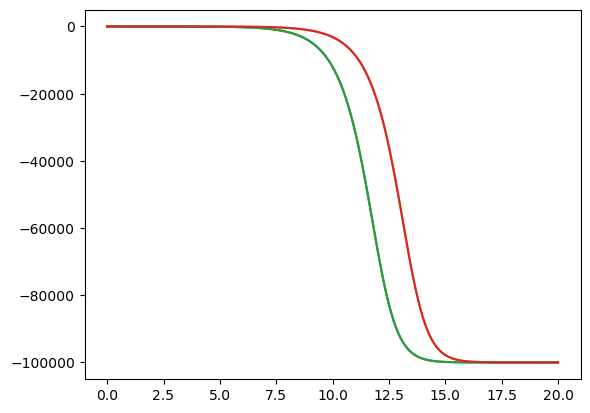

In [384]:
plot(t, u)


u = transpose(u)
print(u)
print(u[1])
print(length(u))



# print(length(length(t[i]))
# print(length(length(u[i]))

        
# print(t[1])
# print(u[1])


# for i in range(1,4)
#     plot(t, u[i])
# end 

In [385]:
#runs N instances of an SDE problem and averages the steady state phases to give a probability between 0 and 1
# function get_probability(problem, N)
#     phases = 0.0*zeros(N)
#     for i in 1:N
#         sol = solve(problem);
        
#         t = sol.t
#         u = sol.u;

#         αsol = [uu[1] for uu in u]

#         final = αsol[end]
#         if final > 0
#             phases[i] = 1.
#         else
#             phases[i] = 0.
#         end
#     end
#     p_plus = sum(phases)/N
#     return p_plus
# end

#runs N instances of an SDE problem and averages the steady state phases to give a probability between 0 and 1
function get_probability(problem, N)
    phases1 = 0.0*zeros(N)
    phases2 = 0.0*zeros(N)
    for i in 1:N
        sol = solve(problem);
        
        t = sol.t
        u = sol.u;

        α1sol = [uu[1] for uu in u]
        α2sol = [uu[2] for uu in u]

        final1 = α1sol[end]
        if final1 > 0
            phases1[i] = 1.
        else
            phases1[i] = 0.
        end
        
        final2 = α2sol[end]
        if final2 > 0
            phases2[i] = 1.
        else
            phases2[i] = 0.
        end
        
    end
    p_plus1 = sum(phases1)/N
    p_plus2 = sum(phases2)/N
    return p_plus1, p_plus2
end



function probability_from_sample(sample)
    result = 0.0*zeros(length(sample))
    for (i, s) in enumerate(sample)
        if s == 0
            result[i] = 0.5
        elseif s > 0
            result[i] = 1.
        else
            result[i] = 0.
        end
    end
    return sum(result)/length(sample)
end


probability_from_sample (generic function with 1 method)

In [386]:

    
function covariance_from_samples(sample1, sample2)
    result1 = 0.0 .* zeros(length(sample1))
    result2 = 0.0 .* zeros(length(sample2))
    res1xres2= 0.0*zeros(length(sample1))
    
    for i in 1:length(sample1)
        if sample1[i] == 0
            result1[i] = 0.5
        elseif sample1[i] > 0
            result1[i] = 1.0
        else
            result1[i] = 0.0
        end
        
        if sample2[i] == 0
            result2[i] = 0.5
        elseif sample2[i] > 0
            result2[i] = 1.0
        else
            result2[i] = 0.0
        end
        res1xres2[i] = result1[i]*result2[i]
    end
    
    e_1 = sum(result1)/length(sample1)
    e_2 = sum(result2)/length(sample2)
    e_12= sum(res1xres2)/length(sample2)
    
    return e_12 - e_1*e_2 
end


covariance_from_samples (generic function with 1 method)

In [387]:
#runs N instances of an SDE problem and returns trajectories
function get_trajectories(problem, N, dt)
    sol = solve(problem, saveat=dt);
    tout = sol.t
    
    phases1 = 0.0*zeros(N)
    phases2 = 0.0*zeros(N)
    trajectories1 = 0.0*zeros(N, length(tout))
    trajectories2 = 0.0*zeros(N, length(tout))
    for i in 1:N
        sol = solve(problem, saveat=dt);
        u = sol.u;

        α1sol = [uu[1] for uu in u]
        α2sol = [uu[2] for uu in u]
        α1starsol = [uu[3] for uu in u]
        α2starsol = [uu[4] for uu in u]
        X1 = (α1sol .+ α1starsol) / 2 #taking the "real" quadrature only
        X2 = (α2sol .+ α2starsol) / 2
        
        trajectories1[i,:] = X1
        trajectories2[i,:] = X2
        
        #phase determination -> TAKING ABSOLUTE VALUE ALPHA 
        final1 = α1sol[end]
        if final1 > 0
            phases1[i] = 1.
        else
            phases1[i] = 0.
        end


        final2 = α1sol[end]
        if final2 > 0
            phases2[i] = 1.
        else
            phases2[i] = 0.
        end
        
    end
    p_plus1 = sum(phases1)/N
    p_plus2 = sum(phases2)/N
    return tout, trajectories1, trajectories2, p_plus1, p_plus2
end

#returns steady state theoretical field value for OP)
function steady_α(g, λ)
    return sqrt(λ - 1 + g^2)/g
end

steady_α (generic function with 1 method)

In [388]:
#number of trajectories
N = 5000

#run trajectories
@time tout, trajectories1, trajectories2, p_plus1, p_plus2 = get_trajectories(problem, N, 0.1);

 16.395726 seconds (1.94 M allocations: 306.875 MiB, 1.05% gc time, 1.74% compilation time)


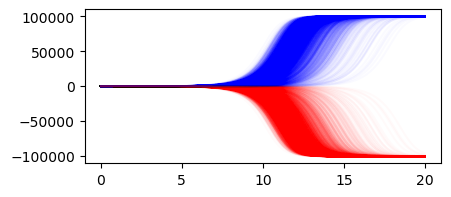

In [389]:



figure(figsize=(4.6,2))

#subplot(211)

sample_trajectories1 = trajectories1[1:1:end,:]
sample_trajectories2 = trajectories2[1:1:end,:]

# print(sample_trajectories)
N_traj = size(sample_trajectories1)[1]


# print(N_traj)

# print(N_traj)
for i in 1:N_traj
    traj = sample_trajectories1[i,:]
    if traj[end] > 0
        plot(tout, traj, "blue", alpha=0.02);
    else
        plot(tout, traj, "red", alpha=0.02);
    end
end




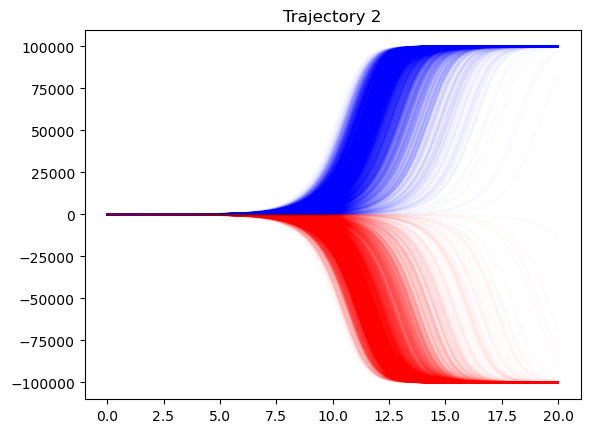

PyObject Text(0.5, 1.0, 'Trajectory 2')

In [390]:
for i in 1:N_traj
    traj = sample_trajectories2[i,:]
    if traj[end] > 0
        plot(tout, traj, "blue", alpha=0.02);
    else
        plot(tout, traj, "red", alpha=0.02);
    end
end

title("Trajectory 2")


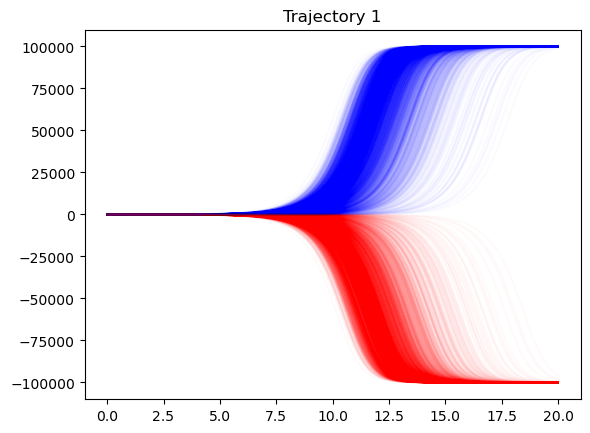

PyObject Text(0.5, 1.0, 'Trajectory 1')

In [391]:

for i in 1:N_traj
    traj = sample_trajectories1[i,:]
    if traj[end] > 0
        plot(tout, traj, "blue", alpha=0.02);
    else
        plot(tout, traj, "red", alpha=0.02);
    end
end
title("Trajectory 1")







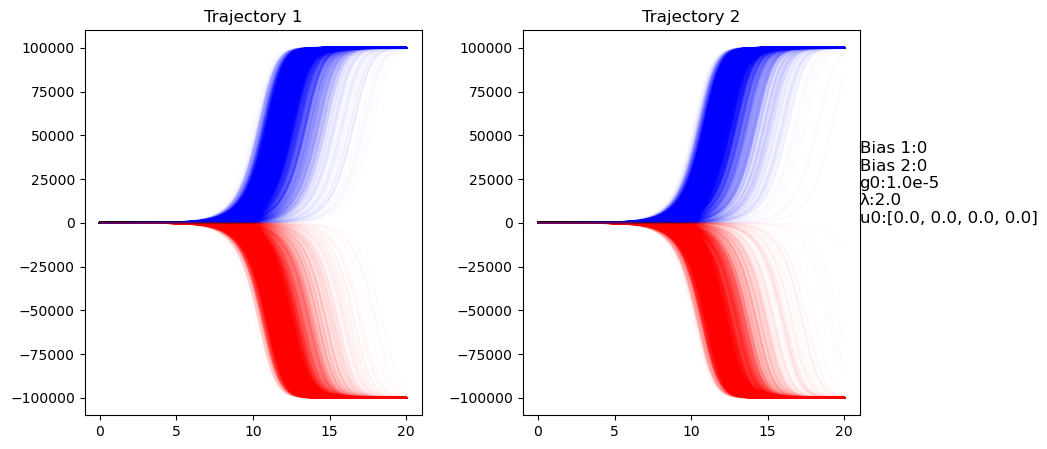

In [392]:
# Create a figure and set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


for i in 1:N_traj
    traj = sample_trajectories1[i,:]
    if traj[end] > 0
        ax1.plot(tout, traj, "blue", alpha=0.02);
    else
        ax1.plot(tout, traj, "red", alpha=0.02);
    end
end
ax1.set_title("Trajectory 1")


for i in 1:N_traj
    traj = sample_trajectories2[i,:]
    if traj[end] > 0
        ax2.plot(tout, traj, "blue", alpha=0.02);
    else
        ax2.plot(tout, traj, "red", alpha=0.02);
    end
end
ax2.set_title("Trajectory 2")

# Adjust spacing between plots
plt.subplots_adjust(wspace=0.3)


plt.annotate(string("Bias 1:", b[1], "\nBias 2:", b[2], "\ng0:", g0, "\nλ:", λ, "\nu0:", u0), xy=(21, -20), fontsize=12)


# Display the plot
plt.show()


In [393]:
print(get_probability(problem, 1000)[1])
print(get_probability(problem, 1000)[2])

0.50.495

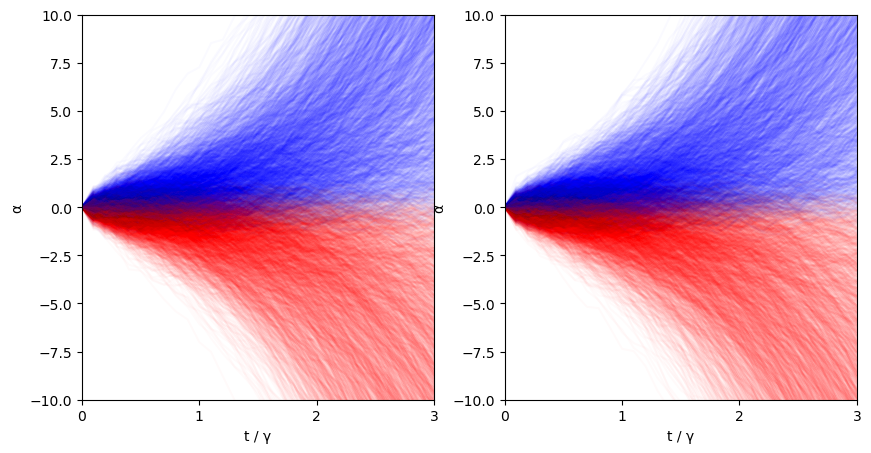

In [394]:
#Zoomed-in Version

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# for i in 1:N_traj
#     traj = sample_trajectories1[i,:]
#     if traj[end] > 0
#         ax1.plot(tout, traj', "blue", alpha=0.02);
#     else
#         ax1.plot(tout, traj', "red", alpha=0.02);
#     end
# end

# for i in 1:N_traj
#     traj = sample_trajectories2[i,:]
#     if traj[end] > 0
#         ax2.plot(tout, traj', "blue", alpha=0.02);
#     else
#         ax2.plot(tout, traj', "red", alpha=0.02);
#     end
# end



fig, ax = subplots(1, 2, figsize=(10, 5))

# Define the axis limits
xlim_values = [0.0, 3]
ylim_values = [-10, 10]

# Loop through the subplots
for (i, traj_data) in enumerate([sample_trajectories1, sample_trajectories2])
    # Plot the data
    for j in 1:N_traj
        traj = traj_data[j, :]
        if traj[end] > 0
            ax[i].plot(tout, traj', "blue", alpha=0.02)
        else
            ax[i].plot(tout, traj', "red", alpha=0.02)
        end
    end
    
    # Set the axis limits
    ax[i][:set_xlim](xlim_values[1], xlim_values[2])
    ax[i][:set_ylim](ylim_values[1], ylim_values[2])
    ax[i][:set_xticks](0:1:3)
    ax[i][:set_xlabel]("t / γ")
    ax[i][:set_ylabel]("α")
end


show()

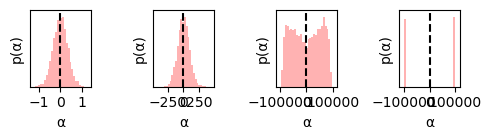

In [395]:
kslices = [2, 50, 118, 200]; #sample points at which to take time slices for probabilities

figure(figsize=(5,1.5))
for (i, k) in enumerate(kslices)
    slice = trajectories1[:,k]
    
    bound = maximum(abs.(slice))
    
    subplot(1,4,i)
    n, bins, patches = hist(slice, bins=27, density=true, color="red", alpha=0.3);
    
    ymax = 1.1*maximum(n)
    
    vlines([0.], 0, ymax, "black", linestyle="dashed")
    ylim(0, ymax)
    xlim(-1.2*bound, 1.2*bound)
    yticks([])
    #xticks([])
    xlabel("α")
    ylabel("p(α)")
end

tight_layout()
#xlim(-1.2*α0, 1.2*α0)

#savefig("macroscopic_probability_evolution.svg")

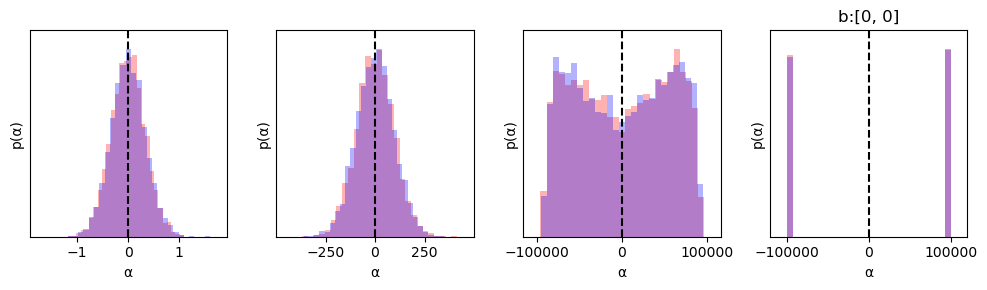

In [396]:

kslices = [2, 50, 118, 200] # Sample points at which to take time slices for probabilities

figure(figsize=(10,3))
for (i, k) in enumerate(kslices)
    slice1 = trajectories1[:, k]
    slice2 = trajectories2[:, k]
    
    bound1 = maximum(abs.(slice1))
    bound2 = maximum(abs.(slice2))
    
    subplot(1, 4, i)
    n1, bins1, patches1 = hist(slice1, bins=27, density=true, color="red", alpha=0.3)
    n2, bins2, patches2 = hist(slice2, bins=27, density=true, color="blue", alpha=0.3)
    
    ymax = max(maximum(n1), maximum(n2)) * 1.1
    
    vlines([0.], 0, ymax, "black", linestyle="dashed")
    ylim(0, ymax)
    xlim(-1.2 * max(bound1, bound2), 1.2 * max(bound1, bound2))
    yticks([])
    xlabel("α")
    ylabel("p(α)")
end

title("b:" * string(b))

tight_layout()

In [397]:
# pos_traj = [probability_from_sample(trajectories1[:,i]) for i in 1:length(tout)];


# subplot(212)

# plot(tout, pos_traj, "black")
# #plot(tout, theory_pos)
# ylim(0.0, 1.1)

# xlim(tspan[1], tspan[end])
# hlines([0.5], tspan[1], tspan[end], "black", linestyle="dashed")

# xlabel("t / γ")
# ylabel("Probability")

# tight_layout()

# print(pos_traj[end])



0.5066
0.51

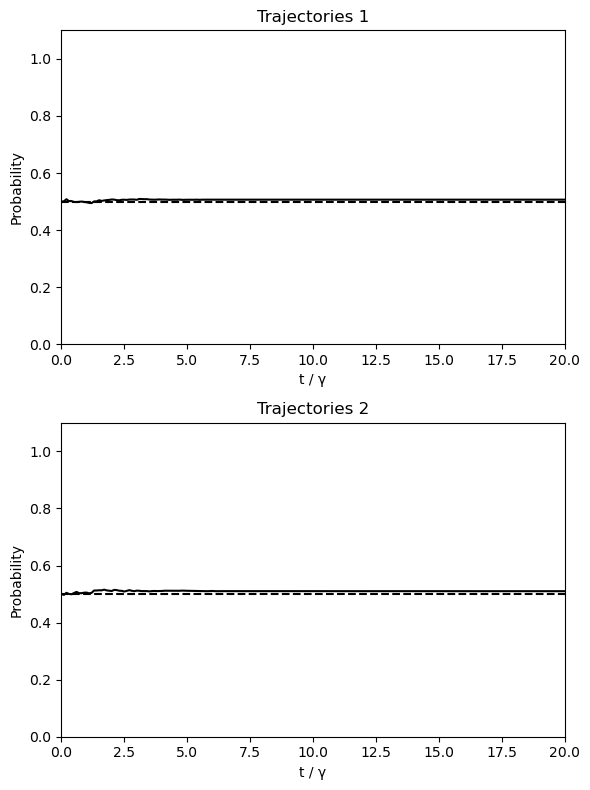

In [398]:
pos_traj1 = [probability_from_sample(trajectories1[:, i]) for i in 1:length(tout)]
pos_traj2 = [probability_from_sample(trajectories2[:, i]) for i in 1:length(tout)]

fig, axs = subplots(2, 1, figsize=(6, 8))

ax1 = axs[1]
ax1.plot(tout, pos_traj1, "black")
ax1.set_ylim(0.0, 1.1)
ax1.set_xlim(tspan[1], tspan[end])
ax1.hlines([0.5], tspan[1], tspan[end], "black", linestyle="dashed")
ax1.set_xlabel("t / γ")
ax1.set_ylabel("Probability")
ax1.set_title("Trajectories 1")

ax2 = axs[2]
ax2.plot(tout, pos_traj2, "black")
ax2.set_ylim(0.0, 1.1)
ax2.set_xlim(tspan[1], tspan[end])
ax2.hlines([0.5], tspan[1], tspan[end], "black", linestyle="dashed")
ax2.set_xlabel("t / γ")
ax2.set_ylabel("Probability")
ax2.set_title("Trajectories 2")

tight_layout()


print(pos_traj1[end], "\n")
print(pos_traj2[end])


-0.004766000000000048

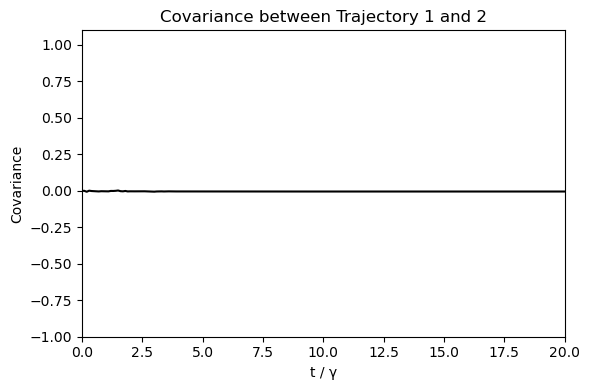

In [399]:
pos_traj = [covariance_from_samples(trajectories1[:, i], trajectories2[:, i]) for i in 1:length(tout)]

fig, ax = subplots(1, 1, figsize=(6, 4))

ax.plot(tout, pos_traj, "black")
ax.set_ylim(-1, 1.1)
ax.set_xlim(tspan[1], tspan[end])
ax.set_xlabel("t / γ")
ax.set_ylabel("Covariance")
ax.set_title("Covariance between Trajectory 1 and 2")

tight_layout()

print(pos_traj[end])


In [400]:


# # Generate data for input bias, coupling parameter, and eventual probability
# input_bias = range(-2, stop=2, length=100)
# coupling_param = range(0, stop=1, length=100)
# probabilities1 = rand(length(input_bias), length(coupling_param))
# probabilities2 = rand(length(input_bias), length(coupling_param))

# # Create heatmap plot
# heatmap(input_bias, coupling_param, probabilities1, 
#         xlabel="Input Bias", ylabel="Coupling Parameter", title="Probabilities 1")





In [401]:
# Heat Maps

# 2. coupling term vs. bias 1, bias 2 held constant 



### Bias 1 vs. Bias 2 Heatmap 

In [402]:
# 1. bias 1 vs. bias 2 probability; coupling pre-determined 

# return matrices for oscillator 1 and oscillator 2 
function run_bias_correlation(bias1, bias2, zeta, N, u0)
    probs1 = fill(0.0, length(bias1), length(bias2))
    probs2 = fill(0.0, length(bias1), length(bias2))
    for (i, b1) in enumerate(bias1)
        for (j, b2) in enumerate(bias2)
            b = [b1, b2] 
            problem = get_SDE_problem(g0, λ, b, u0, tspan, zeta)
            p1, p2 = get_probability(problem, N)
            probs1[j,i] = p1
            probs2[j,i] = p2
        end
    end
    return probs1, probs2 
end 

# probs = run_bias_correlation(bias1, bias2, zeta, N, u0) 
# print(probs)




# using JLD
# save("all_models.jld", "data", all_models)

run_bias_correlation (generic function with 1 method)

In [403]:
# # testing function for just one 

# bias1 = range(-3, 3, length=31)
# bias2 = range(-3, 3, length=31)
# # pumps = [2., 4., 6., 8.]

# u0 = 0. *[1, 1, 1, 1]
# zeta = 0.1
# N = 10


# test1, test2 = run_bias_correlation(bias1, bias2, zeta, N, u0)
# print(test2)

In [404]:
# # print(probs)
# # Create the heatmap

# zeta=[0.001, 0.01, 0.1, 0.5, 2, -0.001, -0.01, -0.1, -0.5, -2]
# zeta_length= length(zeta)

# fig, axes = subplots(zeta_length, 1, figsize=(zeta_length, zeta_length))

# # Plot the heatmaps
# for i in range(1, zeta_length)
#     probs = run_bias_correlation(bias1, bias2, zeta[i], N, u0)
#     ax = axes[i]
#     ax.imshow(probs, cmap="cool", extent=(bias1[1], bias1[end], bias2[1], bias2[end]))
#     ax.set_title("Heatmap {}".format(i + 1))
#     # Add a colorbar
#     cbar = fig.colorbar(cax)
#     cbar.set_label("Probabilties of Final Steady State")
#     ax.set_xlabel("Bias 1")
#     ax.set_ylabel("Bias 2")
# end
    


# plt.title("Zeta: " * string(zeta))

# # Show the plot
# show()


In [405]:

# bias1 = range(-3, 3, length=31)
# bias2 = range(-3, 3, length=31)
# # pumps = [2., 4., 6., 8.]

# u0 = 0. *[1, 1, 1, 1]
# # zeta = 0.1
# N = 10
# zeta=[0.001, 0.01, 0.1, 0.5, 1, 1.5, 1.9]

# # data = [run_bias_correlation(bias1, bias2, zeta[i], N, u0) for i in 1:length(zeta)]

# data1 = []
# data2 = [] 
# for i in 1:length(zeta)
#     p1, p2 = run_bias_correlation(bias1, bias2, zeta[i], N, u0)
#     push!(data1, p1)
#     push!(data2, p2)
# end  


In [406]:
print(length(data1))

print(data1[1])


7[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.0 0.2 0.5 0.3 0.3 0.6 0.5 0.6 0.9 0.9 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.0 0.2 0.3 0.6 0.8 0.7 0.8 0.9 0.9 1.0 0.9 1.0 0.9 1.0 1.0 1.0 1.0 1.0 1.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.2 0.4 0.3 0.5 0.1 0.5 0.8 1.0 0.7 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.2 0.2 0.3 0.5 0.5 0.4 0.7 0.8 0.9 0.9 0.9 1.0 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.3 0.5 0.4 0.6 0.4 0.7 0.9 0.8 0.9 1.0 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.5 0.1 0.5 0.4 0.8 1.0 0.9 1.0 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.1 0.2 0.6 0.4 0.7 0.4 0.7 1.0 1.0 0.8 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0; 0.0 0.0 0.0 0.0 0.0 0.1 0.0 0.0 0.1 0.0 0.0 0.1 0.2 0.1 0.3 0.3 0.5 0.5 0.9 0.8 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0

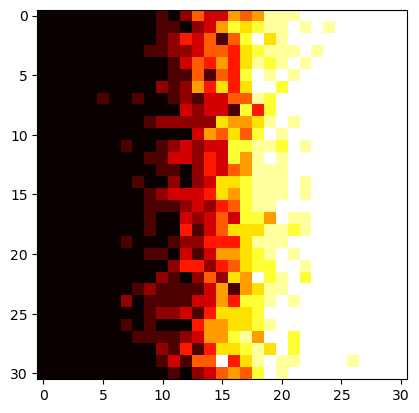

In [407]:
for i in 1:length(zeta)

    imshow(data1[i], cmap="hot")
end 

In [408]:
# probs1 = run_bias_correlation(bias1, bias2, 1, N, u0)
# probs1_5 = run_bias_correlation(bias1, bias2, 1.5, N, u0)
# probs1_9 = run_bias_correlation(bias1, bias2, 1.9, N, u0)


#throws error!!: 
# run_bias_correlation(bias1, bias2, 2, N, u0)

In [409]:


# # Create a new figure
# figure(figsize=(30, length(zeta)*7))

# # Loop through the data and add heatmaps to the plot
# for i in 1:length(zeta)
#     # Create a subplot
#     subplot(7, 1, i)
    
#     # Plot the heatmap using imshow
#     imshow(data1[i], cmap="hot")
    
#     # Set a title for each subplot
#     title("Zeta: " * string(zeta[i]))
    
#     # Add axis titles
#     xlabel("Bias 1")
#     ylabel("Bias 2")
    
#     # Add colorbar
#     colorbar(label="Probabilty")
    
#     PyPlot.xticks([1, 30], [string(bias1[1]), string(bias1[end])])  
#     PyPlot.yticks([1, 30], [string(bias2[1]), string(bias2[end])])
    
# end



# # Adjust the spacing between subplots
# subplots_adjust(hspace=0.25)

# # Display the plot
# show()


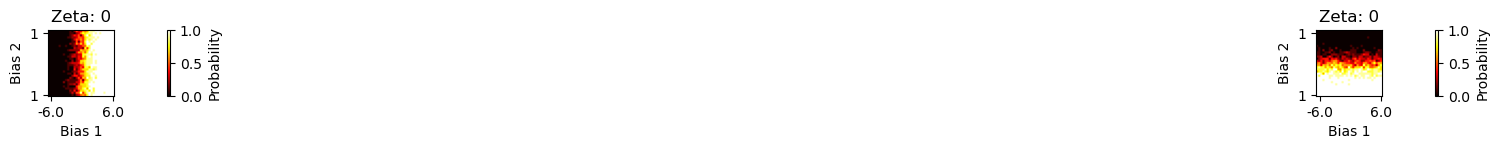

In [410]:
# Create a new figure
figure(figsize=(30, length(zeta)*7))

# Loop through the data and add heatmaps to the plot
for i in 1:length(zeta)
    # Create the first subplot in the first column
    subplot(7, 2, 2*(i-1) + 1)
    
    # Plot the heatmap using imshow with data1
    imshow(data1[i], cmap="hot")
    
    # Set a title for the subplot
    title("Zeta: " * string(zeta[i]))
    
    # Add axis titles
    xlabel("Bias 1")
    ylabel("Bias 2")
    
    # Add colorbar
    colorbar(label="Probability")
    
    # Set x and y tick labels
    PyPlot.xticks([1, 30], [string(bias1[1]), string(bias1[end])])
    PyPlot.yticks([1, 30], [string(bias2[1]), string(bias2[end])])
    
    # Create the second subplot in the second column
    subplot(7, 2, 2*i)
    
    # Plot the heatmap using imshow with data2
    imshow(data2[i], cmap="hot")
    
    # Set a title for the subplot
    title("Zeta: " * string(zeta[i]))
    
    # Add axis titles
    xlabel("Bias 1")
    ylabel("Bias 2")
    
    # Add colorbar
    colorbar(label="Probability")
    
    # Set x and y tick labels
    PyPlot.xticks([1, 30], [string(bias1[1]), string(bias1[end])])
    PyPlot.yticks([1, 30], [string(bias2[1]), string(bias2[end])])
end


## Zeta vs. Bias

In [411]:
function run_zeta_bias_correlation(bias1, bias2, zeta, N, u0)
    probs = fill(0.0, length(bias1), length(zeta))
    for (i, b1) in enumerate(bias1)
        for (j, z) in enumerate(zeta)
            b = [b1, bias2] 
            problem = get_SDE_problem(g0, λ, b, u0, tspan, z)
            prob = get_probability(problem, N)
            probs[j,i] = prob
        end
    end
    return probs
end 

run_zeta_bias_correlation (generic function with 1 method)

In [412]:
# 2. coupling term vs. bias 1, bias 2 held constant 

bias1 = range(-6, 6, length=31)
zeta  = range(0, 2, length=31)
bias2 = 1
# pumps = [2., 4., 6., 8.]

u0 = 0. *[1, 1, 1, 1]
# zeta = 0.1
N = 10


data = [run_zeta_bias_correlation(bias1, bias2, zeta, N, u0)]



LoadError: MethodError: [0mCannot `convert` an object of type [92mTuple{Float64, Float64}[39m[0m to an object of type [91mFloat64[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Union{Static.StaticBool{N}, Static.StaticFloat64{N}, Static.StaticInt{N}} where N[39m) where T<:Number
[0m[90m   @[39m [32mStatic[39m [90m~/.julia/packages/Static/s64Zx/src/[39m[90m[4mStatic.jl:414[24m[39m
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mtwiceprecision.jl:273[24m[39m
[0m  convert(::Type{T}, [91m::VectorizationBase.LazyMulAdd{M, O, I}[39m) where {M, O, I, T<:Number}
[0m[90m   @[39m [33mVectorizationBase[39m [90m~/.julia/packages/VectorizationBase/0dXyA/src/[39m[90m[4mlazymul.jl:25[24m[39m
[0m  ...
